by Yigao Li
# Exercise 1
Let $f({\bf x})=||{\bf y}-{\bf x}||^2$, $g({\bf x})={\bf v}^T{\bf x}-b$,  
then $\nabla f({\bf x})=2({\bf y}-{\bf x})$, $\nabla g({\bf x})={\bf v}$.  
Suppose ${\bf x}^*$ is a solution to this program, $\exists\lambda\in\mathbb{R}$ such that $\nabla f({\bf x}^*)=\lambda\nabla g({\bf x}^*)$
$$\begin{cases}
2({\bf y}-{\bf x}^*)+\lambda{\bf v}=0\\
{\bf v}^T{\bf x}^*-b=0\\
\end{cases}$$
Multiply ${\bf v}^T$ to 1st equation,
$$\begin{aligned}
{\bf v}^T(2({\bf y}-{\bf x}^*)+\lambda{\bf v})&=0\\
2{\bf v}^T{\bf y}-2{\bf v}^T{\bf x}^*+\lambda{\bf v}^T{\bf v}&=0\\
2{\bf v}^T{\bf y}-b+\lambda{\bf v}^2&=0\\
\lambda&=\frac{b-2{\bf v}^T{\bf y}}{{\bf v}^2}\\
\end{aligned}$$
Plug $\lambda$ back to the 1st equation to solve ${\bf x}^*$,
$$\begin{aligned}
2({\bf y}-{\bf x}^*)+\frac{b-2{\bf v}^T{\bf y}}{{\bf v}^2}{\bf v}&=0\\
{\bf x}^*&={\bf y}+\frac{b-2{\bf v}^T{\bf y}}{2{\bf v}^2}{\bf v}\\
\end{aligned}$$
  
# Exercise 2
Generate a dataset

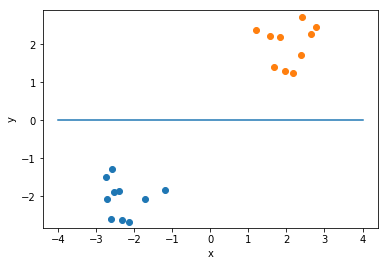

[[-2.32924648 -2.61122687]
 [-2.14881781 -2.66132898]
 [-2.39888678 -1.84413774]
 [-2.73297019 -1.49836405]
 [-2.71066696 -2.05648915]
 [-2.53908191 -1.88089376]
 [-2.5739314  -1.2852603 ]
 [-1.20475905 -1.82457755]
 [-1.72247153 -2.06903283]
 [-2.6241691  -2.58100533]]
[[ 2.76539644  2.45389807]
 [ 2.6410187   2.2600055 ]
 [ 2.41580598  2.7224184 ]
 [ 2.17100951  1.23805708]
 [ 1.20394389  2.38105328]
 [ 2.39141596  1.70968543]
 [ 1.82941048  2.18431704]
 [ 1.9660156   1.28922637]
 [ 1.56681947  2.22672303]
 [ 1.67237459  1.41072205]]


In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

def random_circle(N):
    x = np.reshape(rd.randn(N*2), (N, 2))
    for i in range(N):
        x[i,:] = x[i,:]/np.sqrt(np.sum(x[i,:]**2))
    return x

def random_radius(N, R=1):
    r = rd.rand(N)
    return R*np.sqrt(r) # This ensures uniform sampling from the disc
    

def random_disc(N, mu=[0,0], R=1):
    x = random_circle(N)
    r = random_radius(N, R=R)
    for i in range(N):
        x[i, :] = r[i] * x[i, :] + mu
    return x

N = 10

X = random_disc(N, mu=[-2, -2])
Y = random_disc(N, mu=[2, 2])

plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1])
plt.plot([-4, 4], [0, 0])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [8]:
#import sys
#sys.setrecursionlimit(8000)

(a)

In [17]:
def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        
        if x[3] < 0:
            break
        
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x

fun = lambda a: a[3]
dfun = lambda a: np.array([0,0,0,1])
alpha = 0.2
beta = 0.8
lb1 = lambda a: fun(a)
dlb1 = lambda a: dfun(a)
for x in X:
    h = lambda a: 1+(np.dot(a[:2],x)-a[2])-a[3]
    dh = lambda a :np.array([x[0],x[1],-1,-1])
    lb1 = lambda a: lb1(a) - np.log(-h(a))
    dlb1 = lambda a: dlb1(a) - dh(a)/h(a)
for y in Y:
    h = lambda a: 1-(np.dot(a[:2],y)-a[2])-a[3]
    dh = lambda a: np.array([-y[0],-y[1],1,-1])
    lb1 = lambda a: lb1(a) - np.log(-h(a))
    dlb1 = lambda a: dlb1(a) - dh(a)/h(a)

# Let initial z=0
x1 = np.zeros((4, 2))
x1[:,0] = np.array([-20,20,10,0])
#dx = -dlb1(x1[:,0])
#x1[:, 1], xs, fs = backtracking(x1[:,0], dx, lb1, -dx, alpha=alpha, beta=beta, verbose=True)
print(x1)

[[-20.   0.]
 [ 20.   0.]
 [ 10.   0.]
 [  0.   0.]]


(Recursion is set at 8000 but it still exceeds maximum recursion limit. This code should get a least a $({\bf v},b,z)$ such that $z<0$)  
  
(b) 

In [19]:
fun = lambda a: (a[0]**2+a[1]**2)/2
dfun = lambda a: np.array([2*a[0],2*a[1],0])
alpha = 0.1
beta = 0.5
lb1 = lambda a: fun(a)
dlb1 = lambda a: dfun(a)
for x in X:
    h = lambda a: 1+(np.dot(a[:2],x)-a[2])
    dh = lambda a :np.array([x[0],x[1],-1])
    lb1 = lambda a: lb1(a) - np.log(-h(a))
    dlb1 = lambda a: dlb1(a) - dh(a)/h(a)
for y in Y:
    h = lambda a: 1-(np.dot(a[:2],y)-a[2])
    dh = lambda a: np.array([-y[0],-y[1],1])
    lb1 = lambda a: lb1(a) - np.log(-h(a))
    dlb1 = lambda a: dlb1(a) - dh(a)/h(a)
a = x1[:3,1]
x1 = np.zeros((3,3))
x1[:,0] = a
#x1[:, 1], xs, fs = backtracking(x1[:,0], -dlb1(x1[:,0]), lb1, dlb1(x1[:,0]), alpha=alpha, beta=beta, verbose=True)
#x1[:, 2], xs, fs = backtracking(x1[:, 1], -dlb1(x1[:,1]), lb1, dlb1(x1[:,1]), alpha=alpha, beta=beta, verbose=True)
print(x1)
lb2 = lambda a: fun(a)
dlb2 = lambda a: dfun(a)
for x in X:
    h = lambda a: 1+(np.dot(a[:2],x)-a[2])
    dh = lambda a :np.array([x[0],x[1],-1])
    lb2 = lambda a: lb2(a) - 0.1*np.log(-h(a))
    dlb2 = lambda a: dlb2(a) - 0.1*dh(a)/h(a)
for y in Y:
    h = lambda a: 1-(np.dot(a[:2],y)-a[2])
    dh = lambda a: np.array([-y[0],-y[1],1])
    lb2 = lambda a: lb2(a) - 0.1*np.log(-h(a))
    dlb2 = lambda a: dlb2(a) - 0.1*dh(a)/h(a)
x2 = np.zeros((3,3))
x2[:,0] = x1[:,2]
#x2[:, 1], xs, fs = backtracking(x2[:,0], -dlb2(x2[:,0]), lb2, dlb2(x2[:,0]), alpha=alpha, beta=beta, verbose=True)
#x2[:, 2], xs, fs = backtracking(x2[:, 1], -dlb2(x2[:,1]), lb2, dlb2(x2[:,1]), alpha=alpha, beta=beta, verbose=True)
print(x2)
lb3 = lambda a: fun(a)
dlb3 = lambda a: dfun(a)
for x in X:
    h = lambda a: 1+(np.dot(a[:2],x)-a[2])
    dh = lambda a :np.array([x[0],x[1],-1])
    lb3 = lambda a: lb3(a) - 0.01*np.log(-h(a))
    dlb3 = lambda a: dlb3(a) - 0.01*dh(a)/h(a)
for y in Y:
    h = lambda a: 1-(np.dot(a[:2],y)-a[2])
    dh = lambda a: np.array([-y[0],-y[1],1])
    lb3 = lambda a: lb3(a) - 0.01*np.log(-h(a))
    dlb3 = lambda a: dlb3(a) - 0.01*dh(a)/h(a)
x3 = np.zeros((3,3))
x3[:,0] = x2[:,2]
#x3[:, 1], xs, fs = backtracking(x3[:,0], -dlb3(x3[:,0]), lb3, dlb3(x3[:,0]), alpha=alpha, beta=beta, verbose=True)
#x3[:, 2], xs, fs = backtracking(x3[:, 1], -dlb3(x3[:,1]), lb3, dlb3(x3[:,1]), alpha=alpha, beta=beta, verbose=True)
print(x3)
lb4 = lambda a: fun(a)
dlb4 = lambda a: dfun(a)
for x in X:
    h = lambda a: 1+(np.dot(a[:2],x)-a[2])
    dh = lambda a :np.array([x[0],x[1],-1])
    lb4 = lambda a: lb4(a) - 0.001*np.log(-h(a))
    dlb4 = lambda a: dlb4(a) - 0.001*dh(a)/h(a)
for y in Y:
    h = lambda a: 1-(np.dot(a[:2],y)-a[2])
    dh = lambda a: np.array([-y[0],-y[1],1])
    lb4 = lambda a: lb4(a) - 0.001*np.log(-h(a))
    dlb4 = lambda a: dlb4(a) - 0.001*dh(a)/h(a)
x4 = np.zeros((3,3))
x4[:,0] = x3[:,2]
#x4[:, 1], xs, fs = backtracking(x4[:,0], -dlb4(x4[:,0]), lb4, dlb4(x4[:,0]), alpha=alpha, beta=beta, verbose=True)
#x4[:, 2], xs, fs = backtracking(x4[:, 1], -dlb4(x4[:,1]), lb4, dlb4(x4[:,1]), alpha=alpha, beta=beta, verbose=True)
print(x4)
lb5 = lambda a: fun(a)
dlb5 = lambda a: dfun(a)
for x in X:
    h = lambda a: 1+(np.dot(a[:2],x)-a[2])
    dh = lambda a :np.array([x[0],x[1],-1])
    lb5 = lambda a: lb5(a) - 0.0001*np.log(-h(a))
    dlb5 = lambda a: dlb5(a) - 0.0001*dh(a)/h(a)
for y in Y:
    h = lambda a: 1-(np.dot(a[:2],y)-a[2])
    dh = lambda a: np.array([-y[0],-y[1],1])
    lb5 = lambda a: lb5(a) - 0.0001*np.log(-h(a))
    dlb5 = lambda a: dlb5(a) - 0.0001*dh(a)/h(a)
x5 = np.zeros((3,3))
x5[:,0] = x4[:,2]
#x5[:, 1], xs, fs = backtracking(x5[:,0], -dlb5(x5[:,0]), lb5, dlb5(x5[:,0]), alpha=alpha, beta=beta, verbose=True)
#x5[:, 2], xs, fs = backtracking(x5[:, 1], -dlb5(x5[:,1]), lb5, dlb5(x5[:,1]), alpha=alpha, beta=beta, verbose=True)
print(x5)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
